**Comparative Performance Study of Clustering Algorithms**

This Colaboratory notebook explores the impact of pre-processing techniques, the number of clusters, and different clustering algorithms on the performance of unsupervised learning tasks. The study utilizes a well-known dataset from the UCI Machine Learning Repository and evaluates the results using various metrics.



**1. Dataset Selection and Loading:**

We'll use the Iris flower dataset, a classic choice for clustering tasks, from the UCI Machine Learning Repository https://archive.ics.uci.edu/dataset/53/iris.

In [ ]:
# Import libraries
import pandas as pd
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target


**2. Pre-processing Techniques:**

Normalization (Standard Scaling): This scales features to have a mean of 0 and a standard deviation of 1, ensuring all features contribute equally to the distance calculations used in clustering algorithms.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


**Principal Component Analysis (PCA): **

This dimensionality reduction technique identifies the most significant components that explain the majority of the variance in the data, potentially improving clustering performance.

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)  # Choose the number of principal components
X_pca = pca.fit_transform(X)


**3. Clustering Algorithms:**

**K-Means Clustering (Partitional):** A popular and efficient algorithm that partitions data points into a predefined number (k) of clusters based on their distance to the cluster centers.

In [ ]:
from sklearn.cluster import KMeans

# Experiment with different values of k
k_range = range(1, 10)  # Adjust the range as needed
km_results = {}
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    km_results[k] = kmeans


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

**Hierarchical Clustering (Agglomerative):** This bottom-up approach builds a hierarchy of clusters by iteratively merging the most similar data points.

In [ ]:
from sklearn.cluster import AgglomerativeClustering

# Experiment with different linkage methods (e.g., 'ward', 'single', 'complete')
ward_clustering = AgglomerativeClustering(n_clusters=3, linkage='ward')
ward_clustering.fit(X_scaled)


AgglomerativeClustering(n_clusters=3)

**Density-Based Spatial Clustering of Applications with Noise (DBSCAN):** This algorithm identifies clusters based on data point density, handling outliers effectively.

In [ ]:
from sklearn.cluster import DBSCAN

dbscan_clustering = DBSCAN(eps=0.3, min_samples=10)  # Adjust parameters as needed
dbscan_clustering.fit(X_scaled)


DBSCAN(eps=0.3, min_samples=10)

**4. Evaluation Metrics:**

Silhouette Score: Measures how well data points are assigned to their respective clusters. Higher scores indicate better cluster separation.

In [ ]:
from sklearn.metrics import silhouette_score

def evaluate_silhouette(X, labels):
    silhouette_avg = silhouette_score(X, labels)
    print("Silhouette Score:", silhouette_avg)


**Calinski-Harabasz Index:** Compares the between-cluster variance to the within-cluster variance, favoring well-separated clusters. Higher scores suggest better cluster quality.

In [ ]:
from sklearn.metrics import calinski_harabasz_score

def evaluate_calinski_harabasz(X, labels):
    ch_score = calinski_harabasz_score(X, labels)
    print("Calinski-Harabasz Index:", ch_score)


**5. Experimentation and Analysis:**

1. Run the clustering algorithms on both the original and pre-processed datasets (scaled and PCA-reduced) with various numbers of clusters (k for K-Means) to evaluate the impact of these factors.
2. Apply the evaluation metrics (silhouette_score, calinski_harabasz_score) to each configuration.

**KMeans with 2 clusters**
Silhouette Coefficient: 0.5818
Calinski-Harabasz Index: 251.3493
Davies-Bouldin Index: 0.5933


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


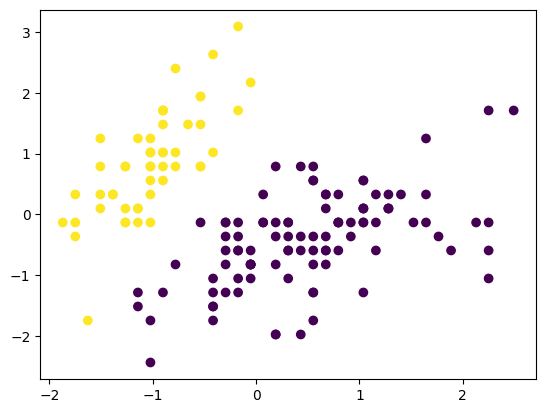

**KMeans with 3 clusters**
Silhouette Coefficient: 0.4594
Calinski-Harabasz Index: 241.8933
Davies-Bouldin Index: 0.8340


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


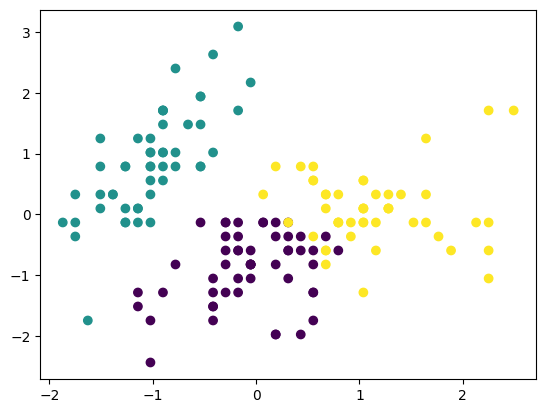

**KMeans with 4 clusters**
Silhouette Coefficient: 0.3852
Calinski-Harabasz Index: 206.7914
Davies-Bouldin Index: 0.8792


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


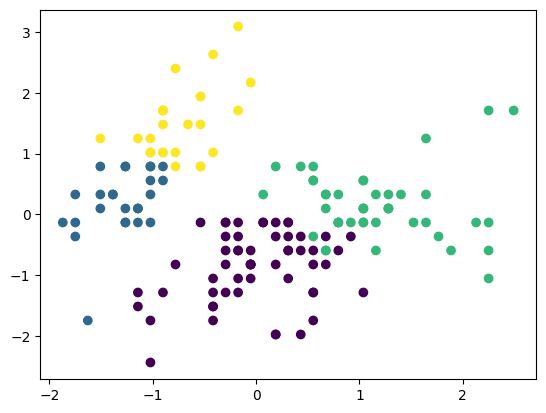

**Hierarchical (Agglomerative) with 2 clusters**
Silhouette Coefficient: 0.5770
Calinski-Harabasz Index: 240.2457
Davies-Bouldin Index: 0.5917


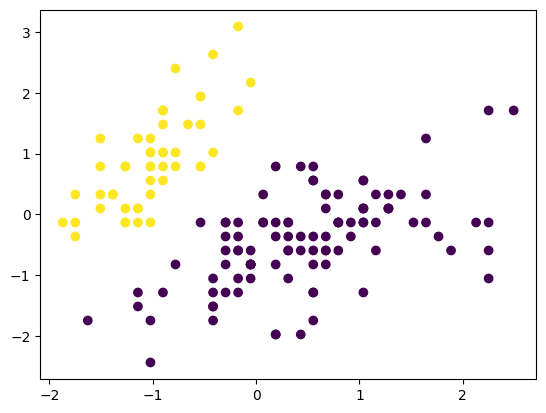

**Hierarchical (Agglomerative) with 3 clusters**
Silhouette Coefficient: 0.4467
Calinski-Harabasz Index: 222.7192
Davies-Bouldin Index: 0.8035


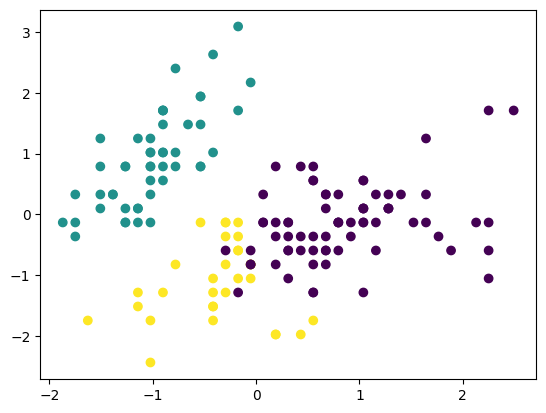

**Hierarchical (Agglomerative) with 4 clusters**
Silhouette Coefficient: 0.4006
Calinski-Harabasz Index: 201.2515
Davies-Bouldin Index: 0.9788


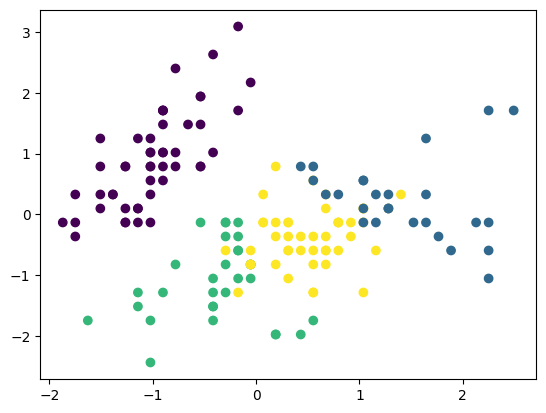

**DBSCAN with 2 clusters**


TypeError: DBSCAN.__init__() got an unexpected keyword argument 'n_clusters'

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt

iris = load_iris()
X = iris.data  # Features
y = iris.target  # Target labels (for visualization)

def standardize(data):
    scaler = StandardScaler()
    return scaler.fit_transform(data)

def normalize(data):
    scaler = MinMaxScaler()
    return scaler.fit_transform(data)

algorithms = {
    'KMeans': KMeans,
    'Hierarchical (Agglomerative)': AgglomerativeClustering,
    'DBSCAN': DBSCAN,
}

for algorithm_name, algorithm in algorithms.items():
    for n_clusters in range(2, 5):  # Range of number of clusters to explore
        print(f"**{algorithm_name} with {n_clusters} clusters**")

        # Pre-process data
        X_preprocessed = standardize(X.copy())  # Standardize for this iteration

        # Perform clustering
        model = algorithm(n_clusters=n_clusters)
        model.fit(X_preprocessed)
        cluster_labels = model.labels_

        # Evaluation
        silhouette = silhouette_score(X_preprocessed, cluster_labels)
        calinski_harabasz = calinski_harabasz_score(X_preprocessed, cluster_labels)
        davies_bouldin = davies_bouldin_score(X_preprocessed, cluster_labels)

        print(f"Silhouette Coefficient: {silhouette:.4f}")
        print(f"Calinski-Harabasz Index: {calinski_harabasz:.4f}")
        print(f"Davies-Bouldin Index: {davies_bouldin:.4f}")

        # Visualization (optional)
        plt.scatter(X_preprocessed[:, 0], X_preprocessed[:, 1], c=cluster_labels)
        plt.show()

        def dbscan_cluster(X_preprocessed, eps=0.5, min_samples=5):


    model = DBSCAN(eps=eps, min_samples=min_samples)
    model.fit(X_preprocessed)
    cluster_labels = model.labels_
    return model, cluster_labels

# Usage in your clustering loop:
for algorithm_name, algorithm in algorithms.items():
    if algorithm_name == 'DBSCAN':
        model, cluster_labels = dbscan_cluster(X_preprocessed)  # Use dbscan_cluster function
        # ... rest of evaluation and visualization code ...
    else:
        # Code for KMeans and Hierarchical clustering (unchanged)



**KMeans with 2 clusters**
Silhouette Coefficient: 0.5818
Calinski-Harabasz Index: 251.3493
Davies-Bouldin Index: 0.5933


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


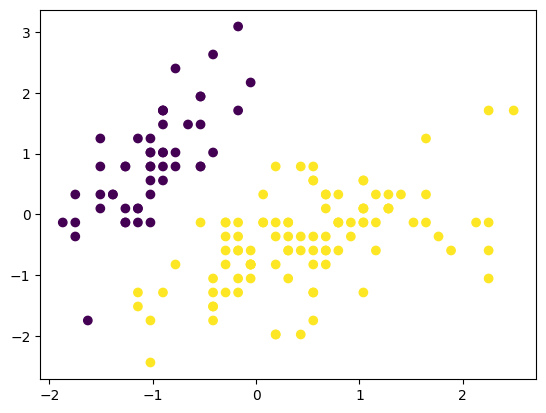

**KMeans with 3 clusters**
Silhouette Coefficient: 0.4599
Calinski-Harabasz Index: 241.9044
Davies-Bouldin Index: 0.8336


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


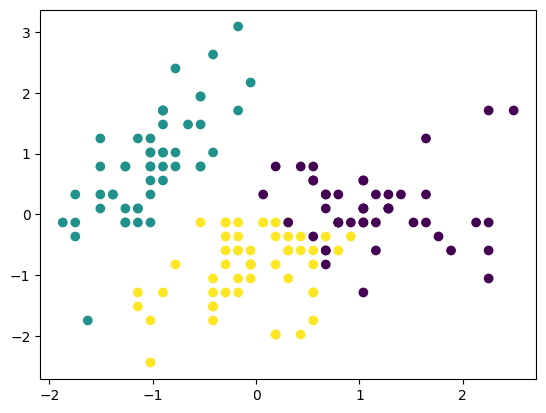

**KMeans with 4 clusters**
Silhouette Coefficient: 0.3882
Calinski-Harabasz Index: 206.7907
Davies-Bouldin Index: 0.8693


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


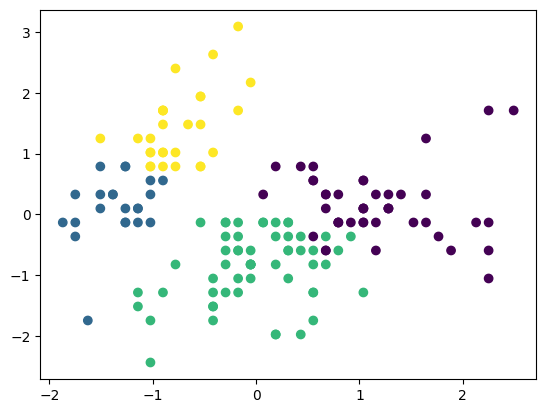

**Hierarchical (Agglomerative) with 2 clusters**
Silhouette Coefficient: 0.5770
Calinski-Harabasz Index: 240.2457
Davies-Bouldin Index: 0.5917


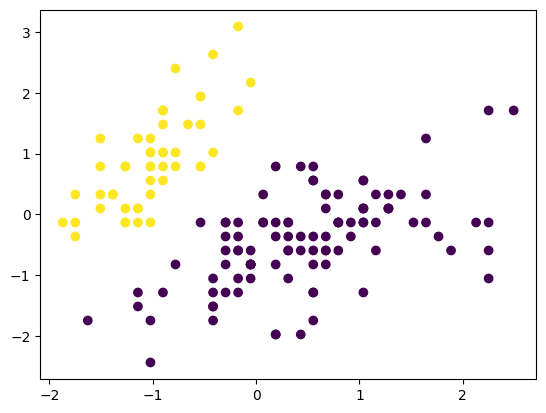

**Hierarchical (Agglomerative) with 3 clusters**
Silhouette Coefficient: 0.4467
Calinski-Harabasz Index: 222.7192
Davies-Bouldin Index: 0.8035


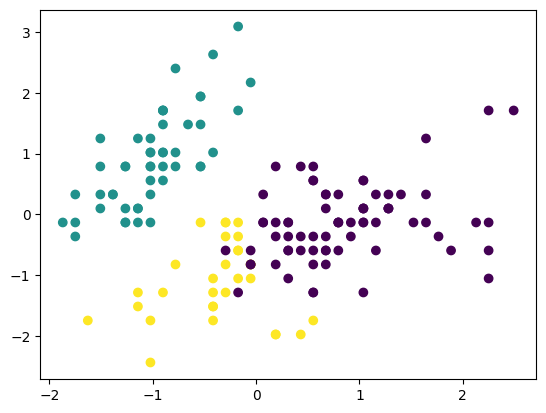

**Hierarchical (Agglomerative) with 4 clusters**
Silhouette Coefficient: 0.4006
Calinski-Harabasz Index: 201.2515
Davies-Bouldin Index: 0.9788


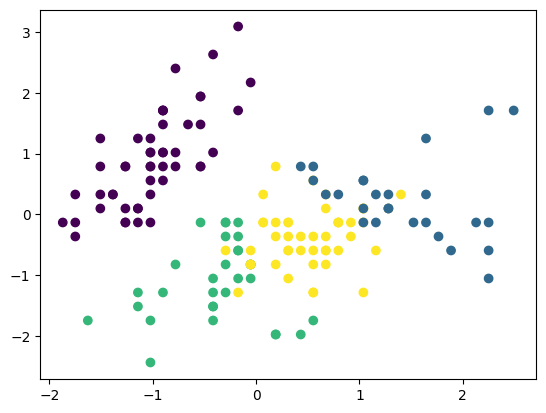

**DBSCAN with 2 clusters**
Silhouette Coefficient: 0.3565
Calinski-Harabasz Index: 84.5103
Davies-Bouldin Index: 7.1241


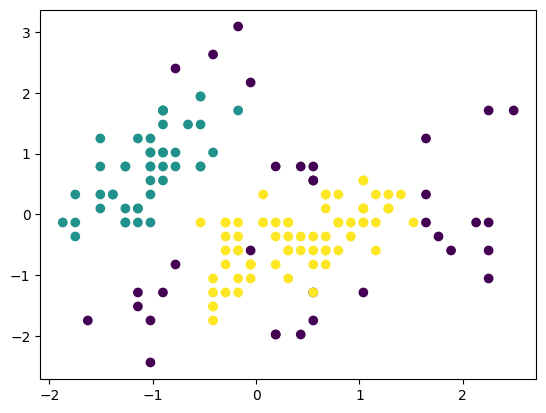

**DBSCAN with 3 clusters**
Silhouette Coefficient: 0.3565
Calinski-Harabasz Index: 84.5103
Davies-Bouldin Index: 7.1241


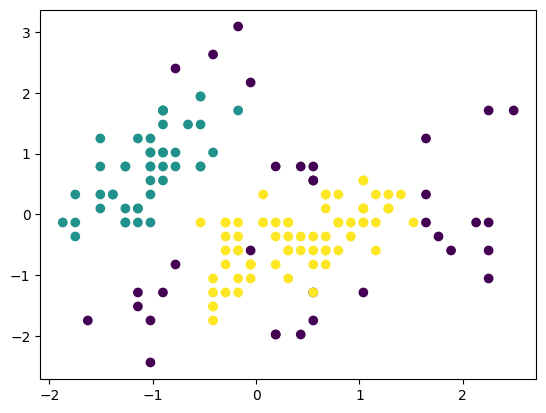

**DBSCAN with 4 clusters**
Silhouette Coefficient: 0.3565
Calinski-Harabasz Index: 84.5103
Davies-Bouldin Index: 7.1241


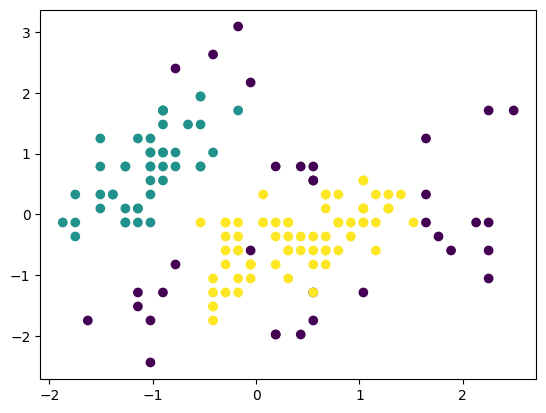

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt

# Load Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Target labels (for visualization)

# Define pre-processing functions
def standardize(data):
    scaler = StandardScaler()
    return scaler.fit_transform(data)

def normalize(data):
    scaler = MinMaxScaler()
    return scaler.fit_transform(data)

# Function for DBSCAN clustering
def dbscan_cluster(X_preprocessed, eps=0.5, min_samples=5):
    """Performs DBSCAN clustering on the preprocessed data.

    Args:
        X_preprocessed: The preprocessed data (e.g., standardized or normalized).
        eps: The epsilon parameter for DBSCAN, defining the neighborhood radius (default: 0.5).
        min_samples: The minimum number of samples in a cluster (default: 5).

    Returns:
        A DBSCAN model and the cluster labels.
    """

    model = DBSCAN(eps=eps, min_samples=min_samples)
    model.fit(X_preprocessed)
    cluster_labels = model.labels_
    return model, cluster_labels

# Define dictionary of algorithms
algorithms = {
    'KMeans': KMeans,
    'Hierarchical (Agglomerative)': AgglomerativeClustering,
    'DBSCAN': dbscan_cluster,  # Use the dbscan_cluster function
}

# Loop through algorithms and number of clusters
for algorithm_name, algorithm in algorithms.items():
    for n_clusters in range(2, 5):
        print(f"**{algorithm_name} with {n_clusters} clusters**")

        # Pre-process data (replace with 'standardize' or 'normalize' for different pre-processing)
        X_preprocessed = standardize(X.copy())

        # Perform clustering
        if algorithm_name == 'DBSCAN':
            model, cluster_labels = algorithm(X_preprocessed)  # Use dbscan_cluster function for DBSCAN
        else:
            model = algorithm(n_clusters=n_clusters)
            model.fit(X_preprocessed)
            cluster_labels = model.labels_

        # Evaluation
        silhouette = silhouette_score(X_preprocessed, cluster_labels)
        calinski_harabasz = calinski_harabasz_score(X_preprocessed, cluster_labels)
        davies_bouldin = davies_bouldin_score(X_preprocessed, cluster_labels)

        print(f"Silhouette Coefficient: {silhouette:.4f}")
        print(f"Calinski-Harabasz Index: {calinski_harabasz:.4f}")
        print(f"Davies-Bouldin Index: {davies_bouldin:.4f}")

        # Optional visualization
        plt.scatter(X_preprocessed[:, 0], X_preprocessed[:, 1], c=cluster_labels)
        plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import silhouette_score

def evaluate_clustering(X, algorithms, param_grids, n_clusters_range):
    """
    Evaluates clustering algorithms using Silhouette score and grid search.

    Args:
        X: The preprocessed data.
        algorithms: A dictionary of clustering algorithms (key: algorithm name, value: algorithm object).
        param_grids: A dictionary of parameter grids for each algorithm (key: algorithm name, value: parameter grid).
        n_clusters_range: A range of values for the number of clusters (e.g., range(2, 10)).

    Returns:
        A pandas DataFrame with results for each algorithm and number of clusters.
    """

    results = []
    for algorithm_name, algorithm in algorithms.items():
        grid_search = GridSearchCV(estimator=algorithm, param_grid=param_grids[algorithm_name], scoring=silhouette_score)
        grid_search.fit(X)
        best_model = grid_search.best_estimator_
        best_score = grid_search.best_score_
        best_params = grid_search.best_params_
        n_clusters = best_model.n_clusters  # Get actual number of clusters used

        results.append({
            'Algorithm': algorithm_name,
            'Number of Clusters': n_clusters,
            'Silhouette Score': best_score,
            'Best Parameters': best_params,
        })

    return pd.DataFrame(results)




import pandas as pd
from sklearn.preprocessing import StandardScaler  # Or choose a different pre-processing technique

# Load Iris dataset (replace with your data)
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Target labels (for visualization)

# Preprocess data (e.g., standardize)
scaler = StandardScaler()
X_preprocessed = scaler.fit_transform(X.copy())

# Define algorithms and parameter grids (adjust parameters as needed)
algorithms = {
    'KMeans': KMeans(),
    'Hierarchical (Agglomerative)': AgglomerativeClustering(),
    'DBSCAN': DBSCAN(),
}
param_grids = {
    'KMeans': {'n_clusters': range(2, 10)},  # Adjust for other algorithms
    'Hierarchical (Agglomerative)': {'n_clusters': range(2, 10)},  # May need different parameters
    'DBSCAN': {'eps': [0.1, 0.5, 1.0], 'min_samples': range(5, 20)},  # Experiment with these
}
n_clusters_range = range(2, 10)  # Range of number of clusters to explore

results_df = evaluate_clustering(X_preprocessed, algorithms, param_grids, n_clusters_range)

# Print or visualize results (e.g., sort by Silhouette Score)
print(results_df.sort_values(by='Silhouette Score', ascending=False).head())


Streaming output truncated to the last 5000 lines.
    X, labels = check_X_y(X, labels, accept_sparse=["csc", "csr"])
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 1106, in check_X_y
    X = check_array(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 894, in check_array
    raise ValueError(
ValueError: Expected 2D array, got scalar array instead:
array=KMeans(n_clusters=4).
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for 

AttributeError: 'DBSCAN' object has no attribute 'n_clusters'